In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the data
data = pd.read_csv('data.csv')

education_data = pd.read_csv('education_data.csv')

In [3]:
# Merge the data 
df = pd.merge(data,
            education_data,
            left_on='unique_id', 
            right_on='unique_id',
            how='left')

## Exploratory data exploration

In [4]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14534 entries, 0 to 14533
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       14534 non-null  object 
 1   birth_year      14534 non-null  int64  
 2   workclass       13813 non-null  object 
 3   fnlwgt          14534 non-null  int64  
 4   marital-status  14534 non-null  object 
 5   occupation      14534 non-null  object 
 6   relationship    14534 non-null  object 
 7   race            14534 non-null  object 
 8   sex             12732 non-null  object 
 9   capital-gain    14534 non-null  int64  
 10  capital-loss    14534 non-null  int64  
 11  hours-per-week  14534 non-null  int64  
 12  native-country  14534 non-null  object 
 13  income          14534 non-null  int64  
 14  education       14147 non-null  object 
 15  education-num   14147 non-null  float64
dtypes: float64(1), int64(6), object(9)
memory usage: 1.9+ MB


In [5]:
# Displaying descriptive statistics of the DataFrame
df.describe()

,birth_year,fnlwgt,capital-gain,capital-loss,hours-per-week,income,education-num
count,14534.000000,1.453400e+04,14534.000000,14534.000000,14534.000000,14534.000000,14147.000000
mean,1985.319733,1.893544e+05,1038.709922,87.633411,40.355718,100233.693340,10.102071
std,13.651412,1.050488e+05,7159.593738,405.333120,12.312948,29017.365858,2.571178
min,1934.000000,1.228500e+04,0.000000,0.000000,1.000000,50003.000000,1.000000
25%,1976.000000,1.176395e+05,0.000000,0.000000,40.000000,75379.000000,9.000000
50%,1987.000000,1.782085e+05,0.000000,0.000000,40.000000,100251.000000,10.000000
75%,1996.000000,2.378718e+05,0.000000,0.000000,45.000000,125349.750000,12.000000
max,2007.000000,1.455435e+06,99999.000000,4356.000000,99.000000,149997.000000,16.000000


## Missing values

In [6]:
# Check for missing values 
df.replace(' ?', np.nan, inplace=True)
df.isnull().sum()

unique_id            0
birth_year           0
workclass         1534
fnlwgt               0
marital-status       0
occupation         868
relationship         0
race                 0
sex               1802
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     265
income               0
education          387
education-num      387
dtype: int64

## Visualisations
The following visualisations demonstrate a range of key insights about the data. 

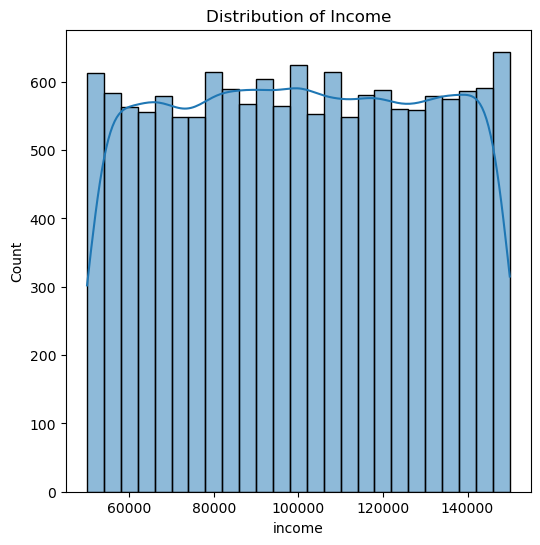

In [7]:
# Visualising the distribution of income
plt.figure(figsize=(6, 6))
sns.histplot(df['income'], kde=True)
plt.title('Distribution of Income')
plt.show()

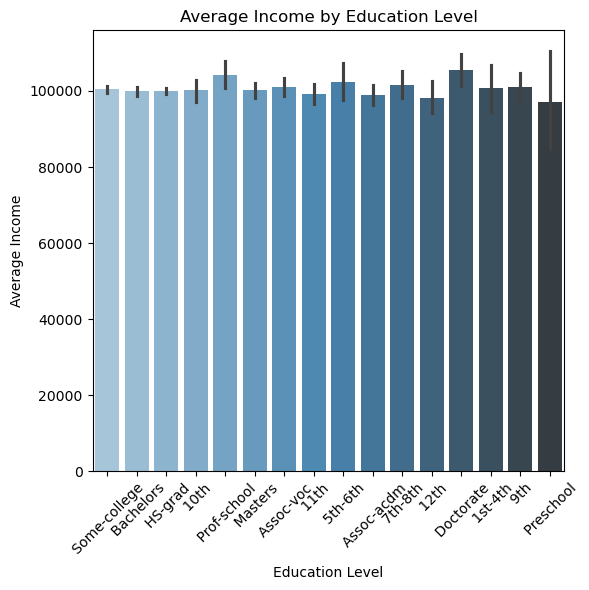

In [8]:
# Visualise income by education level
plt.figure(figsize=(6, 6))
sns.barplot(x='education', y='income', data=df, hue='education', palette='Blues_d', legend=False)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Average Income by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

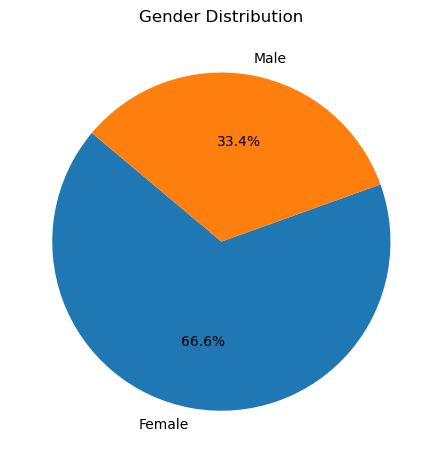

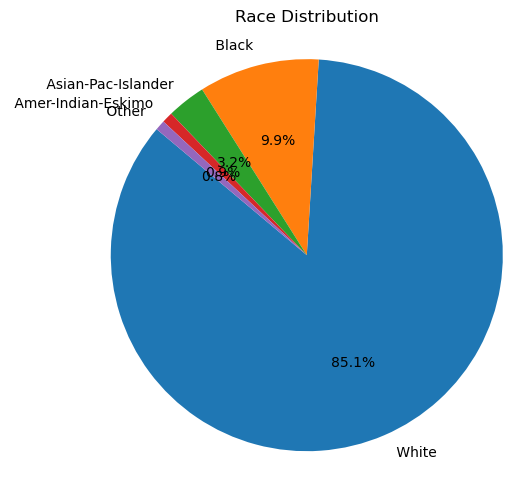

In [9]:
# Gender and race distribution
gender_distribution = df['sex'].value_counts()
race_distribution = df['race'].value_counts()

# Draw pie chart for GENDER
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_distribution, labels=("Female","Male"), autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 2)
plt.pie(race_distribution, labels=race_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Race Distribution')
plt.axis('equal')  

# Show the plots
plt.tight_layout()
plt.show()

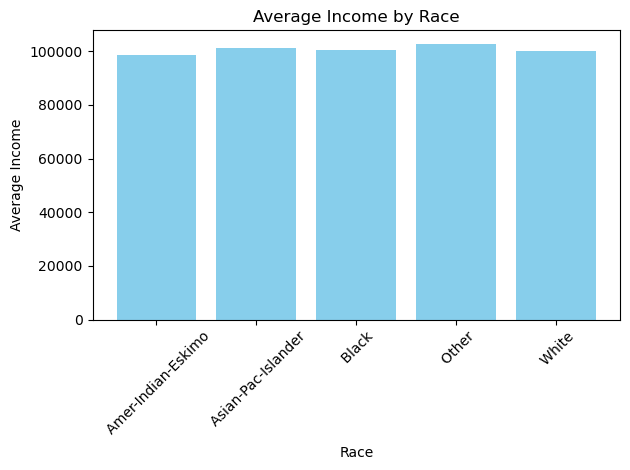

In [10]:
# Average income by race
average_income_by_race = df.groupby('race')['income'].mean().reset_index()

plt.bar(average_income_by_race['race'], average_income_by_race['income'], color='skyblue')
plt.xlabel('Race')
plt.ylabel('Average Income')
plt.title('Average Income by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

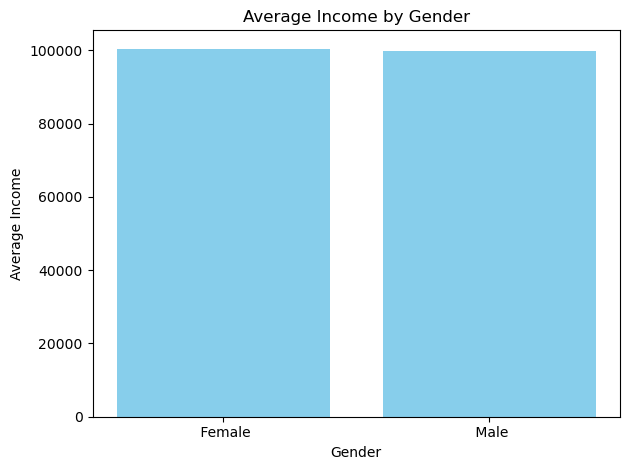

In [11]:
average_income_by_gender = df.groupby('sex')['income'].mean().reset_index()
plt.bar(average_income_by_gender['sex'], average_income_by_gender['income'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.title('Average Income by Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Additional columns

Create an additional column for age using the birth year column. This column for age uses the current date and subtracts the birth year. Having birth year in the 'age' format allows for more simplified analysis. Drop the birth year and education categorical column as these repeat information in previous columns.

In [12]:
# Age column

# Get the current year
current_year = datetime.now().year

# Calculate age
df['age'] = current_year - df['birth_year']

# Remove birth year column
df = df.drop('birth_year', axis=1)

# Remove education categorical column
df = df.drop('education', axis=1)

## Correlation heatmap
This function demonstrates the correlation coefficients between different variables. 

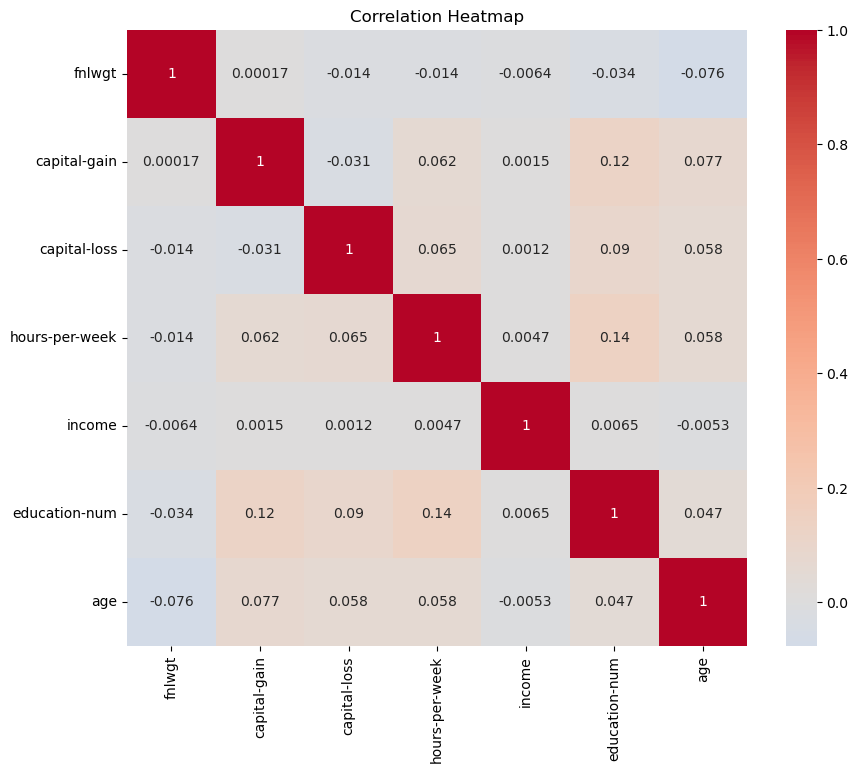

In [13]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Modelling

In [14]:
# Preparing the data for modeling
X = df.drop(columns=['unique_id', 'income','fnlwgt'])  
y = df['income']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')



Mean Absolute Error: 26409.82893577313
Mean Squared Error: 963989690.2751274
Root Mean Squared Error: 31048.183365136316


In [15]:
mape_score = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape_score:.4f}%')

Mean Absolute Percentage Error (MAPE): 0.3025%


<Axes: >

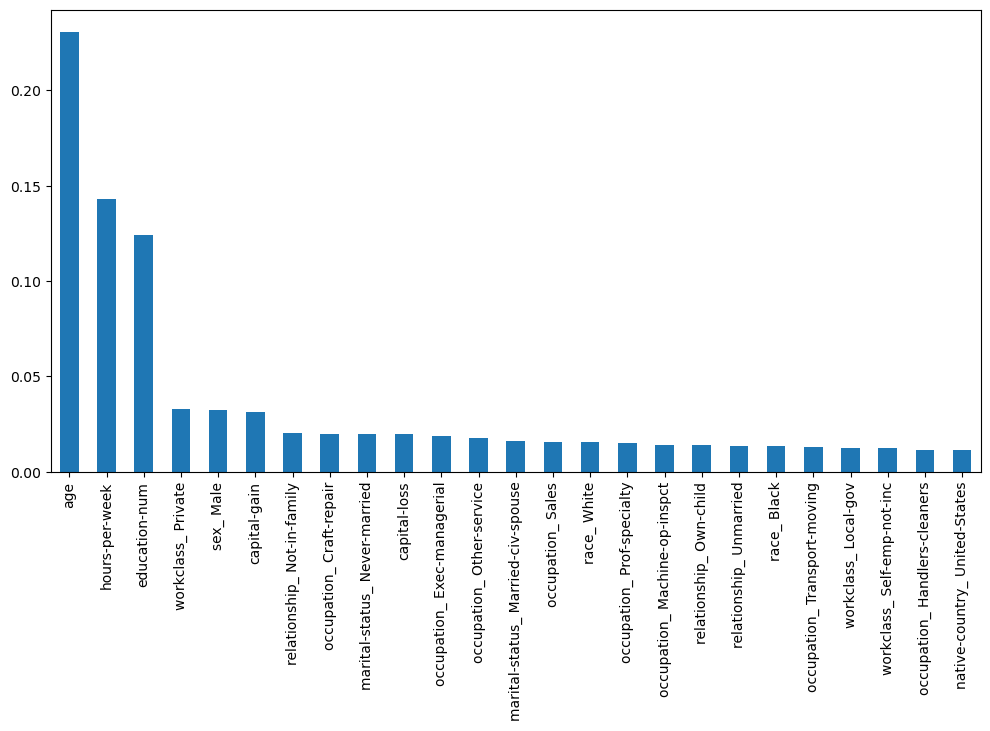

In [16]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# visualise the most important features
feature_importances.head(25).plot(kind='bar', figsize=(12,6))

## Handle missing values

In [17]:
numerical_columns = ['education-num']

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

categorical_columns = ['workclass', 'occupation', 
                      'native-country', 'sex']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
# Preparing the data for modeling
X = df.drop(columns=['unique_id', 'income','fnlwgt'])  
y = df['income']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 26525.924034252224
Mean Squared Error: 973578599.0180123
Root Mean Squared Error: 31202.221059053027


In [19]:
mape_score = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape_score:.4f}%')

Mean Absolute Percentage Error (MAPE): 0.3040%


<Axes: >

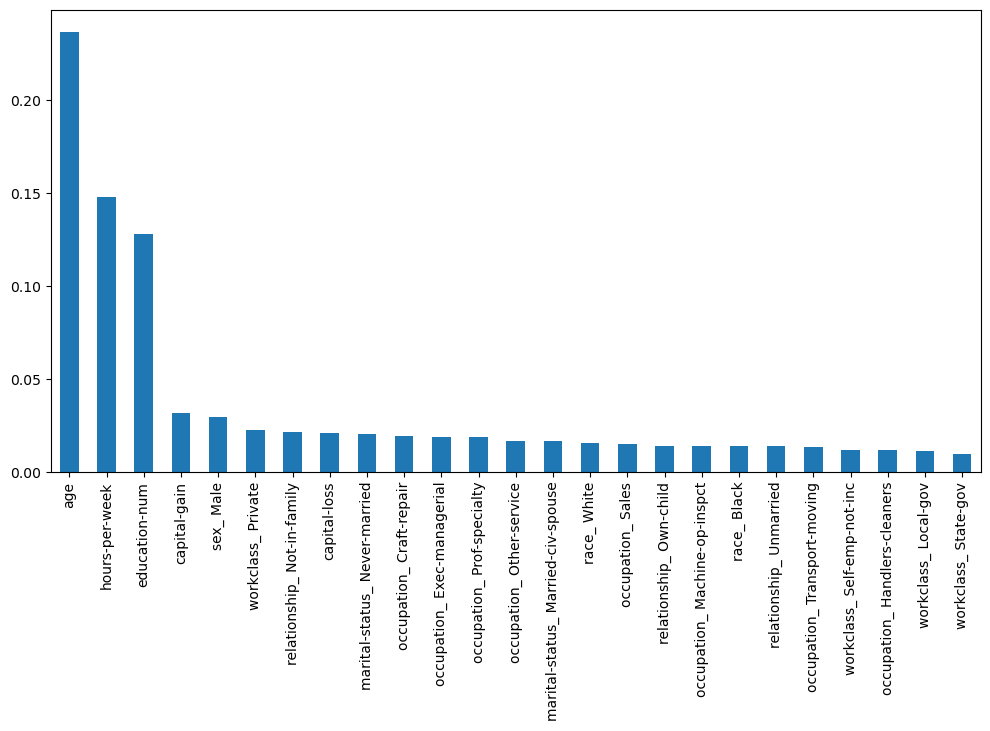

In [20]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# visualise the most important features
feature_importances.head(25).plot(kind='bar', figsize=(12,6))

In [21]:
tree = model.estimators_[99]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns, 
                           filled=True, rounded=True, 
                           special_characters=True,
                           max_depth=4)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf")

# Displaying the decision tree
print('decision tree saved')

decision tree saved
